### Importing Required Libraries

#### Assumptions During the Calculation of Profit
1. All the buy and sell are for 10 stocks.
2. At the end, the remaining bought stocks cost (which werent sell) were taken as investment. 

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Reading the CSV File

In [2]:
data=pd.read_csv("D:DataSets/Nifty.csv")

In [3]:
data.head()

,time,open,high,low,close
0,2020-10-26T06:58:00Z,11822.90,11826.70,11822.70,11823.75
1,2020-10-26T06:59:00Z,11823.55,11824.35,11820.70,11820.70
2,2020-10-26T07:00:00Z,11821.60,11821.60,11811.85,11814.95
3,2020-10-26T07:01:00Z,11814.70,11816.45,11812.80,11813.45
4,2020-10-26T07:02:00Z,11813.80,11814.40,11803.00,11808.85


### Data Preprocessing

#### In order to understand the data like null values, data types and columns. describe and info is used 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16272 entries, 0 to 16271
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    16272 non-null  object 
 1   open    16272 non-null  float64
 2   high    16272 non-null  float64
 3   low     16272 non-null  float64
 4   close   16272 non-null  float64
dtypes: float64(4), object(1)
memory usage: 635.8+ KB


In [5]:
data.describe()

,open,high,low,close
count,16272.000000,16272.000000,16272.000000,16272.000000
mean,13295.455534,13298.763600,13292.125080,13295.466989
std,836.117023,835.867546,836.319496,836.096060
min,11545.950000,11549.100000,11535.450000,11545.550000
25%,12771.112500,12774.637500,12767.650000,12770.937500
50%,13361.525000,13370.400000,13350.950000,13361.375000
75%,13962.625000,13964.775000,13959.200000,13962.600000
max,14650.450000,14653.350000,14646.950000,14651.050000


#### Since, there are no null values, we can proceed with the same. Although, we required to convert time into datetime format. 

In [6]:
# Function code for treating the time column

def date(time):
    data['dt'] = time.astype('datetime64')
    data['day']=data['dt'].dt.day
    data['month']=data['dt'].dt.month
    data['year']=data['dt'].dt.year

In [7]:
# Calling of function

date(data['time'])

In [8]:
def plot(inp):
    plt.plot(data['dt'],data[inp])
    plt.xlabel("Date")
    plt.ylabel(inp + "Data")
    plt.title("Plot between " + inp + " and date")
    plt.show()

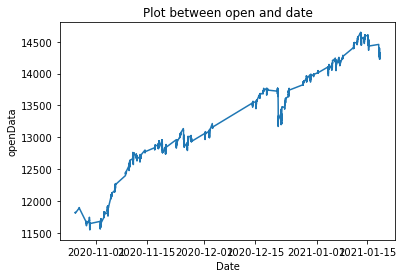

In [9]:
plot('open')

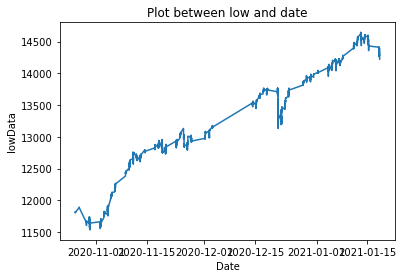

In [10]:
plot('low')

#### Since it shows that the trend is increasing, means the prices are increasing day by day. 

#### Now, we can remove the time and dt column since we have created the day, month and year columns

In [11]:
data.drop(['time','dt'], inplace=True, axis=1)

In [12]:
data.head()

,open,high,low,close,day,month,year
0,11822.90,11826.70,11822.70,11823.75,26,10,2020
1,11823.55,11824.35,11820.70,11820.70,26,10,2020
2,11821.60,11821.60,11811.85,11814.95,26,10,2020
3,11814.70,11816.45,11812.80,11813.45,26,10,2020
4,11813.80,11814.40,11803.00,11808.85,26,10,2020


### Code for Strategy 1

Since we have to see previous day's high price. When prices of current day cross the high of previous day give a "Buy" signal, and buy at that price. This will result in the trade status being "active". If there is no Buy signal, the trade status will be "inactive".

Below code is explained throughly

In [13]:
#Creating a Function

def strategy1(data):
    highindex=[]
    data['high_value']=""   #Creating required data columns
    data['low_value']=""
    
    for i in data['month'].unique():   #calling the loop in month and day
        for j in data['day'].unique():
            
# During the loop, we get the subsequent indexes that will be used to find the high and low value for particular day
#That value is now added in the column of first time of that day. 

            try:  
                k=data[(data['month']==i) & (data['day']==j)].index[0]
                data['high_value'][k]=float(data[(data['month']==i) & (data['day']==j)].high.max())
                data['low_value'][k]=float(data[(data['month']==i) & (data['day']==j)].high.min())
                highindex.append(k)
            except:
                continue

    highindex.append(len(data))
    

    data['buy']=" "
    data['status']='Cant Say'
    k=0
    for i in highindex:

#Here, the buy and status is added as per comparision with the high value of per day

        try:
            highval=data['high_value'][i]
            k=k+1
            for j in range(highindex[k], highindex[k+1]):
                if data['high'][j]>highval:
                    data['buy'][j]="buy" 
                    data['status'][j]="active"
                    


                else:
                    data['status'][j] = "Inactive"
        except:
            continue
            
    return (highindex)


In [14]:
# Calling the Function

highindex=strategy1(data)
highindex.sort()

In [15]:
data.head()

,open,high,low,close,day,month,year,high_value,low_value,buy,status
0,11822.90,11826.70,11822.70,11823.75,26,10,2020,11826.7,11809.6,,Cant Say
1,11823.55,11824.35,11820.70,11820.70,26,10,2020,,,,Cant Say
2,11821.60,11821.60,11811.85,11814.95,26,10,2020,,,,Cant Say
3,11814.70,11816.45,11812.80,11813.45,26,10,2020,,,,Cant Say
4,11813.80,11814.40,11803.00,11808.85,26,10,2020,,,,Cant Say


### Code for Strategy 2 and 3

Target at which to sell will be Buy price, plus the difference of previous day high and low (Buy price + (Previous day high - Previous Day low)).
Maximum loss (Stop Loss) at which to sell will be Buy price, minus one fourth of the difference of previous day high and low (Buy price - 1/4* (Previous day high- Previous Day low)).

Hence, Calculation of target and stop loss is done 

In [16]:
#Function for the two strategies

def strategy2_3(targetindex):
    
    data['target']=" "
    data['stop loss']=" "
    
    m=0
    
    for i in highindex:

        try:

            highval=data['high_value'][i]
            lowval=data['low_value'][i]
            m=m+1
            #here the high and low value are stored in variable that will be used for comaprison
            
            for j in range(highindex[m], highindex[m+1]):
                if data['buy'][j]=='buy':
                    
                    #as per given formulas
                    data['target'][j]=data['high'][j]+(highval-lowval)
                    data['stop loss'][j]=data['high'][j]-((1/4)*(highval-lowval))
                    targetindex.append(j)

        except:
            continue
    return(targetindex)

In [17]:
targetindex=[]
targetindex=strategy2_3(targetindex)

In [18]:
#Target and Stop Loss are started from next day. Since we have to take previous day high and low values for calculations. 

data.head()

,open,high,low,close,day,month,year,high_value,low_value,buy,status,target,stop loss
0,11822.90,11826.70,11822.70,11823.75,26,10,2020,11826.7,11809.6,,Cant Say,,
1,11823.55,11824.35,11820.70,11820.70,26,10,2020,,,,Cant Say,,
2,11821.60,11821.60,11811.85,11814.95,26,10,2020,,,,Cant Say,,
3,11814.70,11816.45,11812.80,11813.45,26,10,2020,,,,Cant Say,,
4,11813.80,11814.40,11803.00,11808.85,26,10,2020,,,,Cant Say,,


### Strategy 4

As soon as a target/Stop Loss is met, it counts as 1 trade, and the trade status becomes "inactive". A Buy signal can only be generated if the trade status is "inactive".

The code is written as

In [19]:
dtct={}
nonlist=[]
for i in data.index:
    if data['target'][i]!=" ":
        dtct[i]=data['target'][i]
    else:
        nonlist.append(i)

In [20]:
data['trade']=" "
for k in dtct.keys():
    for j in range(750,len(data)):
        if j > k:           
               if data['high'][j]>=round(dtct.get(k)):
                     if data['trade'][j]==" ":
                        data['trade'][j]="Trade "+ str(k)
                        data['status'][j]=="Inactive"                       
                        break

In [22]:
dtct2={}
for i in data.index:
    if data['stop loss'][i]!=" ":
        dtct2[i]=data['stop loss'][i]

        

for k in dtct2.keys():
    for j in range(750,len(data)):
        if j > k:           
               if data['high'][j]>=round(dtct2.get(k)):
                     if data['trade'][j]==" ":
                        data['trade'][j]="Trade "+ str(k)
                        data['status'][j]=="Inactive"   
       
                        break

### OUTPUT CALCULATIONS

#### Number of times, particular strategy 1 has occured in a day

In [23]:
for i in data['month'].unique():
    for j in data['day'].unique():
        try:
            k=data[(data['month']==i) & (data['day']==j)].index[0]
            number=len(data[(data['month']==i) & (data['day']==j) & (data['buy']=='buy')])
        
#Use of length here buy exists per day basis.

            if number!=0:
                print("On {0}-{1}-".format(j,i) + str(data['year'][k]) + ", {0} times strategy 1 has occurred".format(number))
        except:
            continue

On 27-10-2020, 9 times strategy 1 has occurred
On 30-10-2020, 98 times strategy 1 has occurred
On 26-11-2020, 375 times strategy 1 has occurred
On 2-11-2020, 53 times strategy 1 has occurred
On 3-11-2020, 375 times strategy 1 has occurred
On 4-11-2020, 375 times strategy 1 has occurred
On 5-11-2020, 375 times strategy 1 has occurred
On 6-11-2020, 375 times strategy 1 has occurred
On 9-11-2020, 119 times strategy 1 has occurred
On 10-11-2020, 375 times strategy 1 has occurred
On 11-11-2020, 375 times strategy 1 has occurred
On 12-11-2020, 375 times strategy 1 has occurred
On 13-11-2020, 370 times strategy 1 has occurred
On 14-11-2020, 17 times strategy 1 has occurred
On 17-11-2020, 293 times strategy 1 has occurred
On 18-11-2020, 375 times strategy 1 has occurred
On 19-11-2020, 375 times strategy 1 has occurred
On 20-11-2020, 375 times strategy 1 has occurred
On 23-11-2020, 375 times strategy 1 has occurred
On 24-11-2020, 375 times strategy 1 has occurred
On 25-11-2020, 375 times strate

#### Total number of buys occured in given time period

In [24]:
print("In the course of the given time period, Buy has occurred " + str(len(data[data['buy']=='buy'])) + " times")

In the course of the given time period, Buy has occurred 14020 times


#### Total Profit and Remaining Investment

In [25]:
data['profit/loss']=" "
for i in data.index:
    if data['trade'][i]!=" ":
        ind=int(data['trade'][i].split()[-1])
        data['profit/loss'][i]=int(data['high'][i])-int(data['high'][ind])
    else:
        data['profit/loss'][i]=0


In [26]:
data.tail()

,open,high,low,close,day,month,year,high_value,low_value,buy,status,target,stop loss,trade,profit/loss
16267,14241.65,14244.30,14237.50,14239.95,18,1,2021,,,,Inactive,,,Trade 4139,1397
16268,14239.30,14239.30,14233.80,14236.50,18,1,2021,,,,Inactive,,,Trade 4140,1393
16269,14237.20,14239.20,14233.30,14237.05,18,1,2021,,,,Inactive,,,Trade 4141,1393
16270,14236.35,14237.10,14224.95,14230.85,18,1,2021,,,,Inactive,,,Trade 4142,1389
16271,14229.35,14232.95,14222.80,14230.20,18,1,2021,,,,Inactive,,,Trade 4143,1385


In [27]:
print("The profit gained by them is ", float(sum(data['profit/loss']))*10)

The profit gained by them is  64380020.0


In [28]:
print("Remaining money in investment is ", data[data['trade']==" "].high.sum())

Remaining money in investment is  9113532.25
